In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro

In [3]:
Path.cwd()
print(Path.cwd())

/Users/lenewessel/Desktop/python_projects


In [4]:
path = "/Users/lenewessel/Desktop/python_projects/sleep_deprivation_dataset/sleep_deprivation_dataset_detailed.csv"
df = pd.read_csv(path)
df.head(10)

,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32
3,P4,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23
4,P5,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14
5,P6,3.94,12,6,2.84,58.80,46,224.48,28,Male,32.23,3,6,29
6,P7,3.35,8,18,3.16,50.90,31,201.56,22,Male,32.74,4,5,16
7,P8,8.20,14,21,3.28,74.69,66,388.37,29,Male,32.25,1,0,4
8,P9,6.61,12,1,1.74,58.94,38,258.28,20,Female,25.24,3,4,28
9,P10,7.25,0,9,2.61,68.32,23,221.28,18,Male,21.78,3,4,3


In [5]:
rows, columns = df.shape
print(f'the dataset has {rows} rows and {columns} columns')

the dataset has 60 rows and 14 columns


I have taken this datset from Kaggle and now need to define the questions I want to answer from this dataset. They evaluated the reaction time and working memory of participants in the context of sleep deprivation. What I find interesting about this dataset is the fact that the sleep hours are not similar among participants. I would be interested to see how the actual study was performed because even if a participant gets 8 hours of sleep, the sleep quality might be terrible. I do see that there is a sleep quality score, but I do not know how this was measured. It is also unclear if there is a control group. It would have been interesting to see a participants scores for each test before and after sleep deprivation. It is difficult to control for these variables, but it also makes them difficult to compare. 

### What is the Stroop Task?

The Stroop task is a method used in neuroscience and psychology research to evaluate processing speed. In the tests, the word "purple" may be on display in a different coloured font and participants must state the colour of the word, not the word spelled out. There is often a delay in reaction time to state the colour when the word spells a different colour than the font. 

### What is N-back accuracy?

N-back accuracy is a way to assess someone's working memory. Participants are presented with a stimulus, and then presented other stimuli at different intervals. Eventually, the original stimulus will show up again and the participants must state how far back the original stimulus was presented. This is the n number. For example, you are presented a picture of a dog, then presented with a picture of a cat, then a frog, then a dog again. The n-back from the dog is 2. The longer the interval between the original stimulus, the more difficult the task. 

### Questions and Defining the Data:

Since I do not know how the study was performed and if the participants who got 8 hours or more are considered a control group, I am going to define anyone who got less than 7.0 hours of sleep as sleep deprived and anyone who received more are a control group. 

I think the easiest thing to start with the information presented is to compare between males and females and then try to dig deeper.

- How many hours did males vs. females sleep?
- What was the sleep quality in males vs. females?
- Were there differences in the stroop-task reaction time? What if we normalized it to the number of hours slept?
- Were there differences in the N-back accuracy? What if we normalized it to the number of hours slept?
- Is there a correlation between stress levels and sleep quality?

In [6]:
hrs_slept = df['Sleep_Hours'][df['Sleep_Hours'] < 7.0]
print(hrs_slept)

0     5.25
3     6.59
4     3.94
5     3.94
6     3.35
8     6.61
10    3.12
13    4.27
14    4.09
15    4.10
16    4.83
17    6.15
18    5.59
19    4.75
20    6.67
21    3.84
22    4.75
23    5.20
24    5.74
26    4.20
27    6.09
28    6.55
29    3.28
30    6.65
31    4.02
32    3.39
36    4.83
37    3.59
39    5.64
40    3.73
41    5.97
42    3.21
44    4.55
45    6.98
46    4.87
47    6.12
48    6.28
49    4.11
54    6.59
56    3.53
57    4.18
58    3.27
59    4.95
Name: Sleep_Hours, dtype: float64


In [7]:
ctrl_hrs_slept = df['Sleep_Hours'][df['Sleep_Hours'] > 7.0]
print(ctrl_hrs_slept)

1     8.70
2     7.39
7     8.20
9     7.25
11    8.82
12    7.99
25    7.71
33    8.69
34    8.79
35    7.85
38    7.11
43    8.46
50    8.82
51    7.65
52    8.64
53    8.37
55    8.53
Name: Sleep_Hours, dtype: float64


The mean of sleep deprived hours is: 4.868837209302325
The mean control sleep hours is: 8.17470588235294


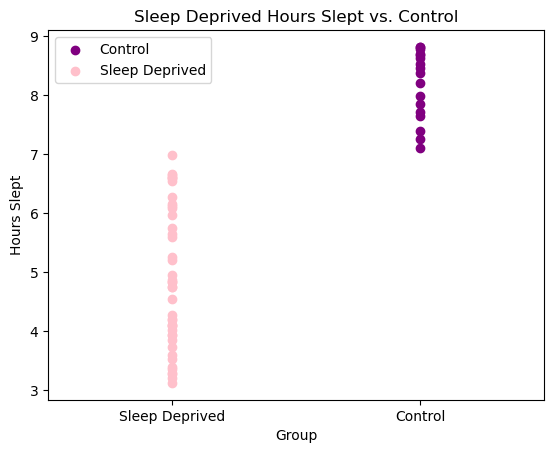

In [10]:
x_hrs_slept = [0]*len(hrs_slept)
x_ctrl_hrs_slept = [1]*len(ctrl_hrs_slept)

mean_hrs_slept = np.mean(hrs_slept)
mean_ctrl = np.mean(ctrl_hrs_slept)
print('The mean of sleep deprived hours is:', mean_hrs_slept)
print('The mean control sleep hours is:', mean_ctrl)

plt.scatter(x_ctrl_hrs_slept, ctrl_hrs_slept, label='Control', color='purple')
plt.scatter(x_hrs_slept, hrs_slept, label='Sleep Deprived', color='pink')

plt.title('Sleep Deprived Hours Slept vs. Control')
plt.xlabel('Group')
plt.ylabel('Hours Slept')
plt.xticks([0,1], ['Sleep Deprived', 'Control'])
plt.xlim(-0.5, 1.5)
plt.legend()
plt.show()

In [11]:
stat, p = shapiro(hrs_slept)
print(f"Shapiro-Wilk Test: statistic={stat}, p-value={p}")

Shapiro-Wilk Test: statistic=0.9278029087881838, p-value=0.009783537345039473


In [12]:
stat, p = shapiro(ctrl_hrs_slept)
print(f"Shapiro-Wilk Test: statistic={stat}, p-value={p}")

if p < 0.05:
    print("The data is not normally distributed")
else: 
    print("The data is normally distributed")


Shapiro-Wilk Test: statistic=0.8984735317946045, p-value=0.0640484979818979
The data is normally distributed
